<a href="https://colab.research.google.com/github/Masha426342/MLOps/blob/main/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод опорных векторов
Цель работы
Изучить работу метода опорных векторов для решения задач классификации и регрессии, познакомиться с основными особенностями и вариациями данного метода. Изучить соответствующие классы библиотеки sklearn, их параметры и атрибуты, применимые на практике.

Содержание работы
Сгенерируйте линейно разделимый датасет для классификации из двух признаков. Постройте на нем опорно-векторный классификатор без ядра с параметром С=100. Изобразите границу принятия решения и линию зазора на графике.
Сгенерируйте линейно неразделимый датасет с зазором между классами. Повторите виуальный анализ на нем.
Сгенерируйте неразделимый датасет так, чтобы классы пересекались. Повторите построение и оценку метода опорных векторов на нем.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

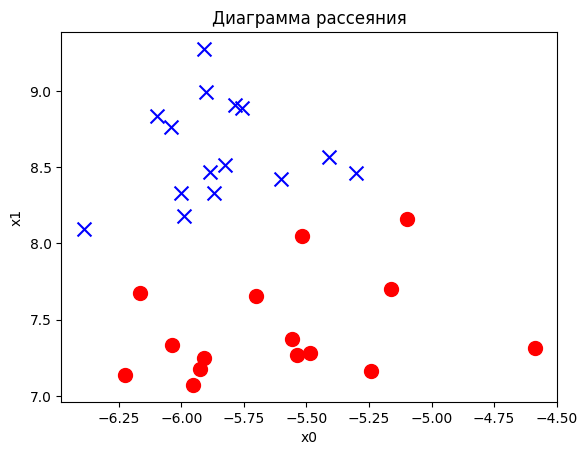

In [4]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [5]:
from sklearn import svm
from sklearn.svm import SVC

In [6]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [7]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [8]:
svm_linear.intercept_

array([-64.2533988])

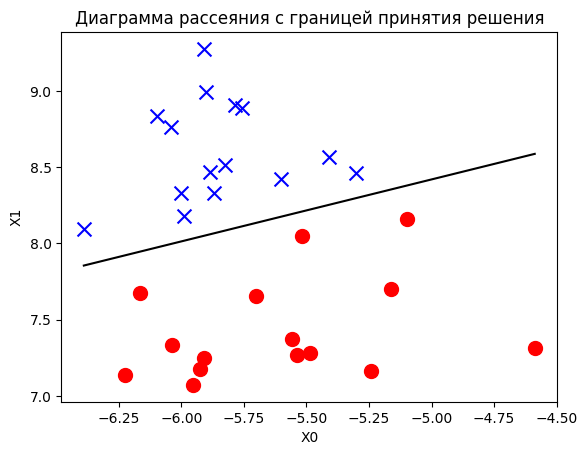

In [9]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [10]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [11]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [12]:
svm_linear.n_support_

array([1, 2], dtype=int32)

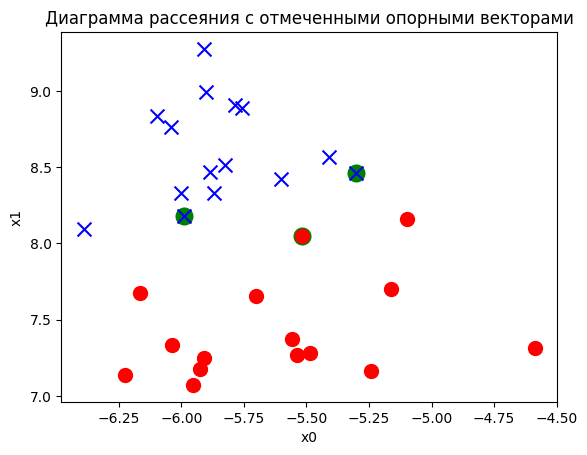

In [13]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

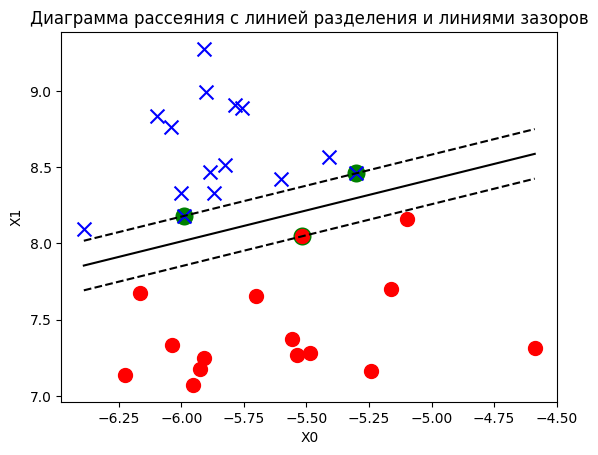

In [14]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

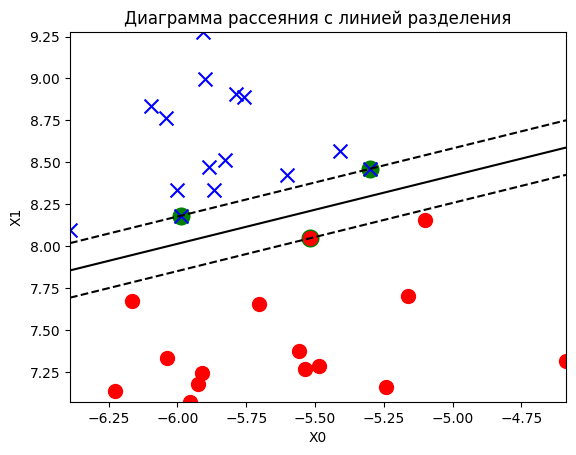

In [15]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [16]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [17]:
y_pred =  svm_linear.predict(X)

In [18]:
observation_new = [[-5.25, 7.5]]

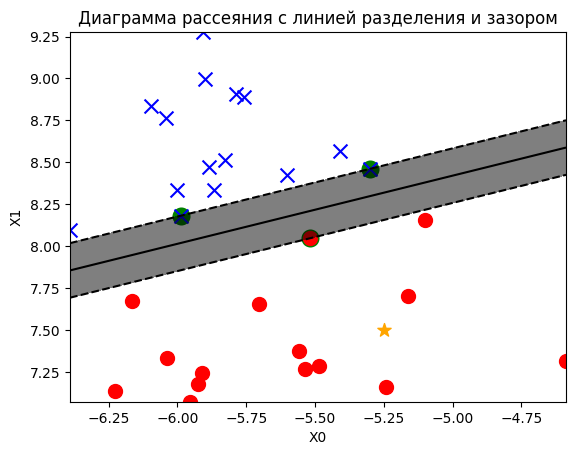

In [19]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [20]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [21]:
svm_linear.predict(observation_new)

array([0])

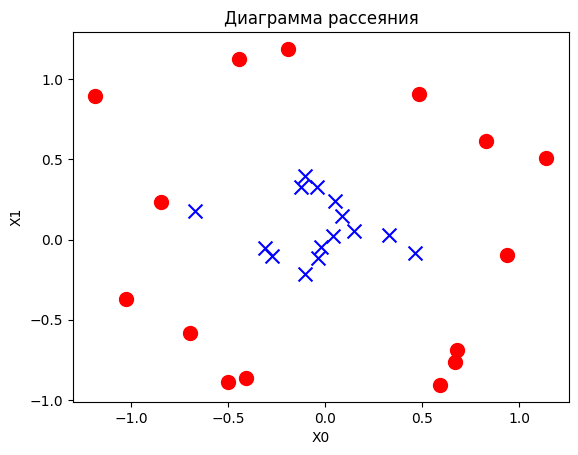

In [22]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [23]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [24]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

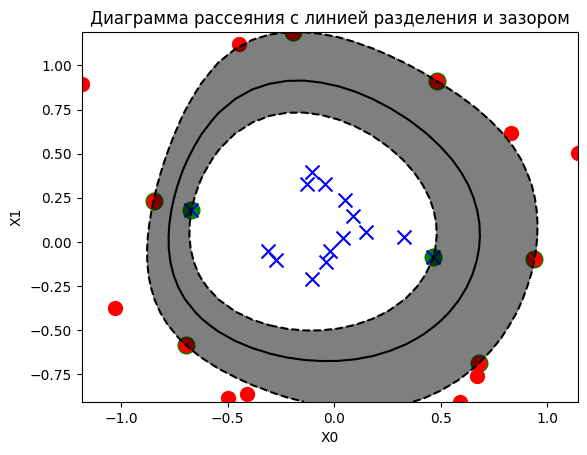

In [25]:
plot_decision_regions(X, y, svm_rbf)

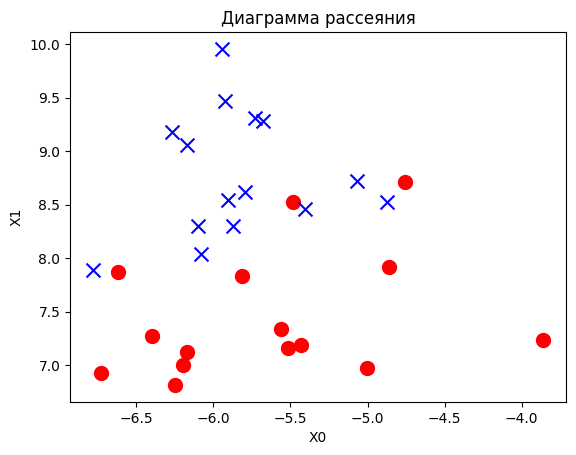

In [26]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [27]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

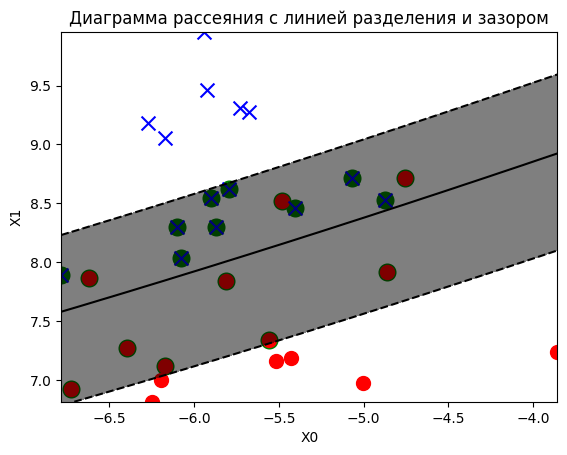

In [28]:
plot_decision_regions(X, y, svm_poly)

In [29]:
svm_poly.n_support_

array([9, 9], dtype=int32)

# Задания для самостоятельного выполнения

1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

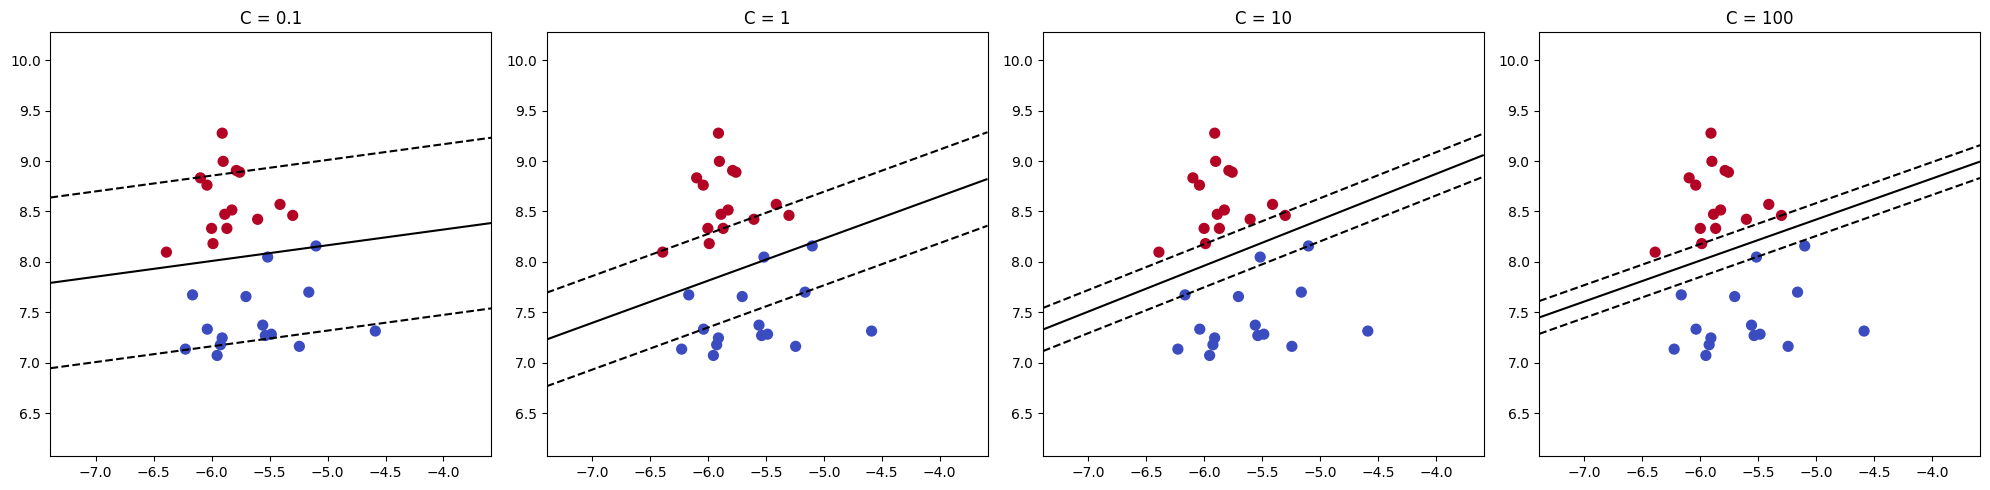

In [30]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Генерация линейно разделимого датасета
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

# Эксперименты с разными значениями C
C_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(20, 5))

for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    # Построение сетки
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    axes[i].contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    axes[i].set_title(f"C = {C}")

plt.tight_layout()
plt.show()


2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

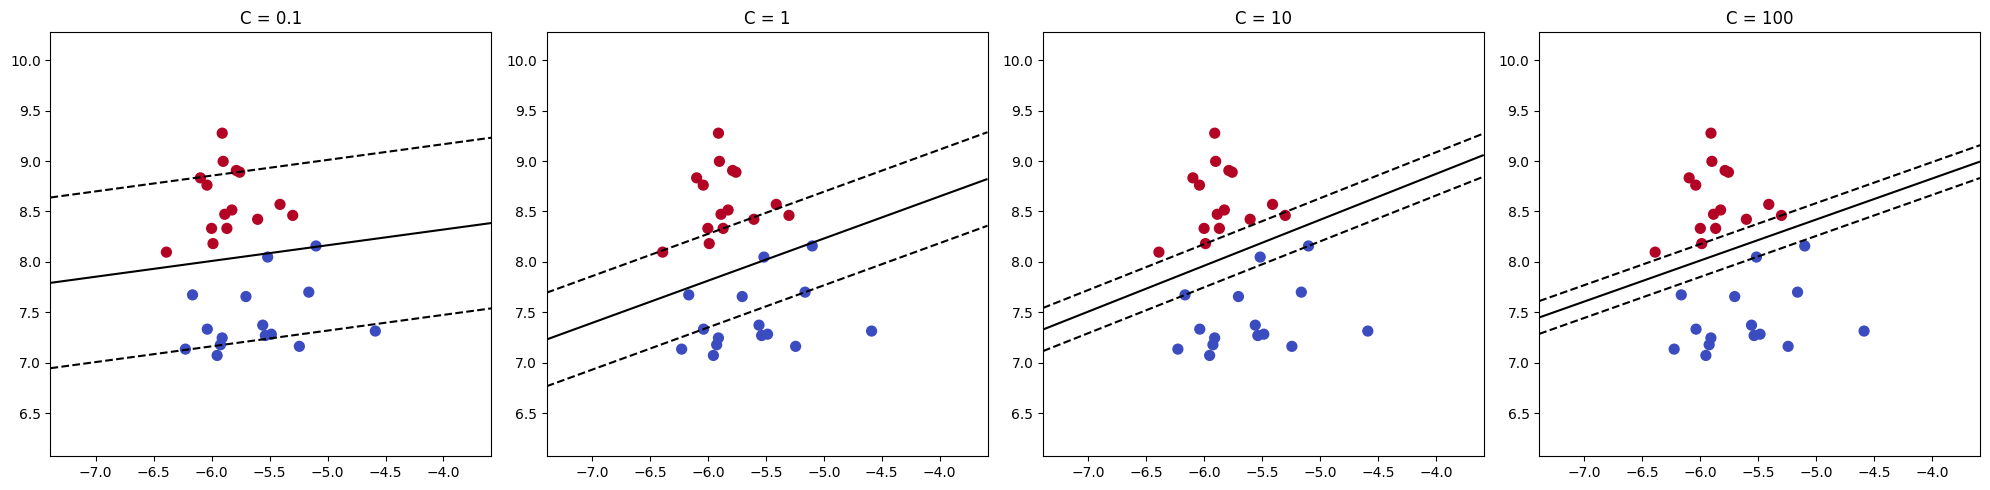

In [31]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Генерация линейно разделимого датасета
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

# Эксперименты с разными значениями C
C_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(20, 5))

for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    # Построение сетки
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    axes[i].contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    axes[i].set_title(f"C = {C}")

plt.tight_layout()
plt.show()


3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

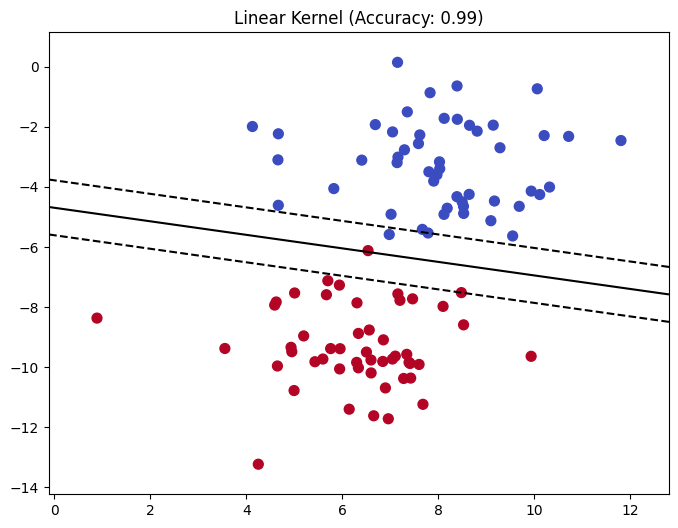

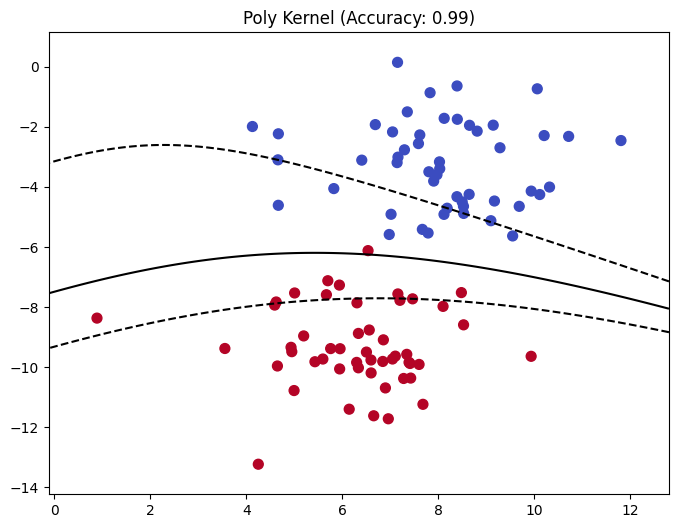

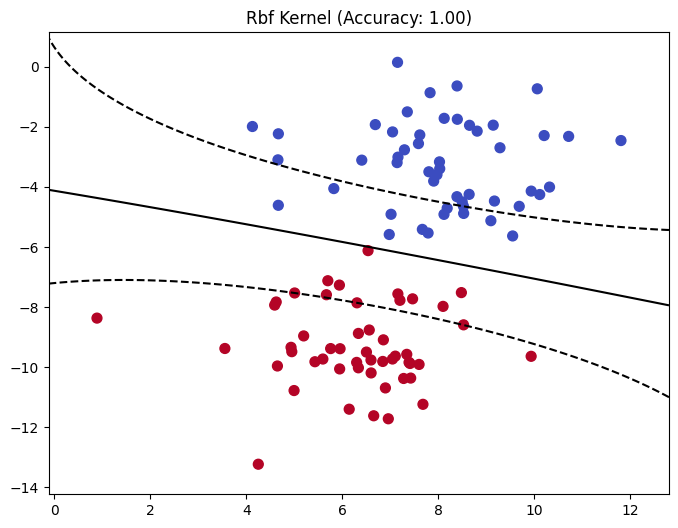

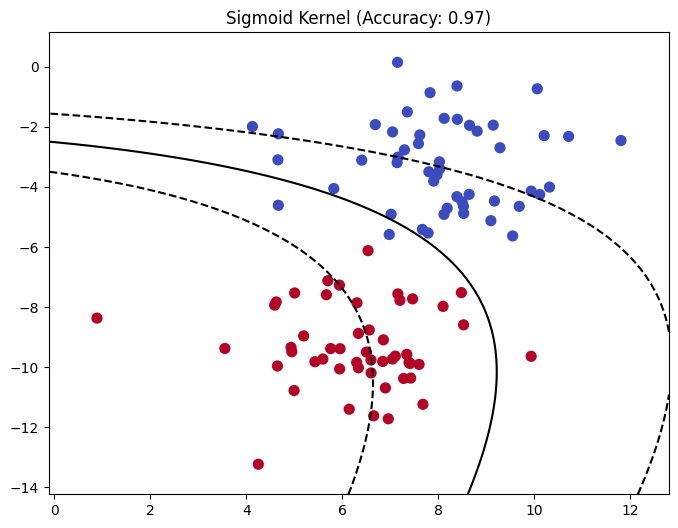

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Генерация линейно неразделимого датасета
X, y = make_blobs(n_features=2, n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Различные ядра для SVM
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

def plot_decision_boundary(svm, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.title(title)
    plt.show()

# Анализ для каждого ядра
for kernel in kernels:
    svm = SVC(kernel=kernel, C=1, degree=3)  # degree для полиномиального ядра
    svm.fit(X, y)
    y_pred = svm.predict(X)
    accuracy = accuracy_score(y, y_pred)
    plot_decision_boundary(svm, X, y, f"{kernel.capitalize()} Kernel (Accuracy: {accuracy:.2f})")


4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

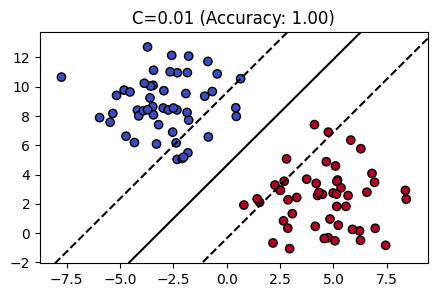

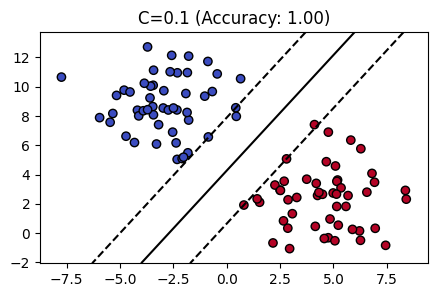

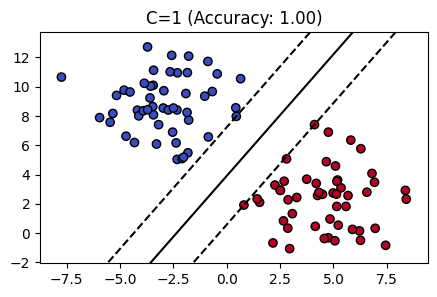

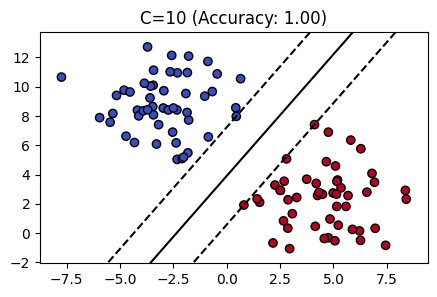

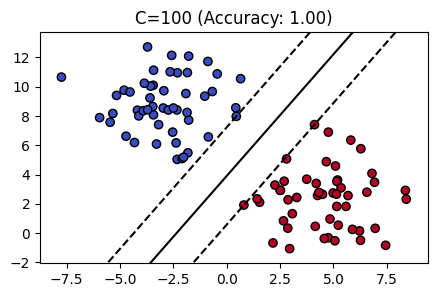

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Генерация линейно неразделимого датасета
X, y = make_blobs(n_features=2, n_samples=100, centers=2, random_state=42, cluster_std=2)

# Функция для визуализации
def plot_svc_decision(svm, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.title(title)
    plt.show()

# Анализ при разных значениях C
C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    accuracy = accuracy_score(y, y_pred)
    plot_svc_decision(svm, X, y, f"C={C} (Accuracy: {accuracy:.2f})")


5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

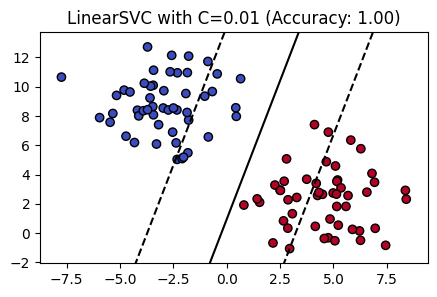

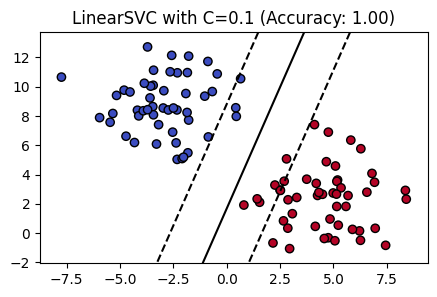

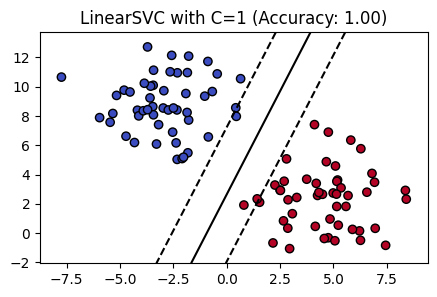

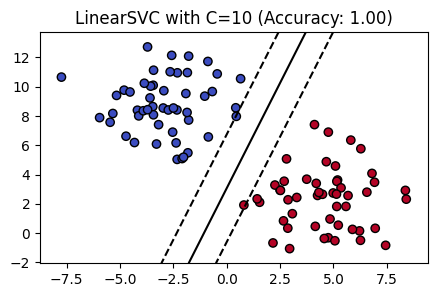

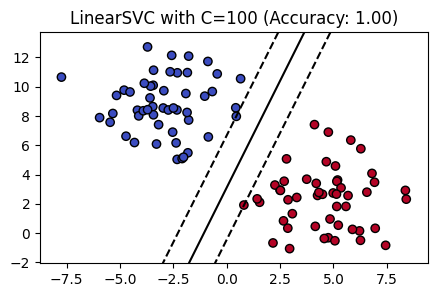

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Генерация линейно неразделимого датасета
X, y = make_blobs(n_features=2, n_samples=100, centers=2, random_state=42, cluster_std=2)

# Функция для визуализации
def plot_linear_svc(svm, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.title(title)
    plt.show()

# Анализ при разных значениях C
C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    linear_svc = LinearSVC(C=C, max_iter=10000, dual=True)
    linear_svc.fit(X, y)
    y_pred = linear_svc.predict(X)
    accuracy = accuracy_score(y, y_pred)
    plot_linear_svc(linear_svc, X, y, f"LinearSVC with C={C} (Accuracy: {accuracy:.2f})")


6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [35]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
import numpy as np

# Генерация датасета
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Подбор наилучшего ядра и значения C с помощью GridSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Типы ядер
    'C': [0.01, 0.1, 1, 10, 100],  # Значения для регуляризации
}

# Сетка поиска по параметрам
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Вывод наилучших параметров и результата
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'C': 100, 'kernel': 'rbf'}, 0.884)

7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [36]:
# Генерация датасета с большим количеством точек
X_large, y_large = make_classification(n_samples=5000, n_features=5, n_classes=2, random_state=42)

# Сетка поиска по параметрам для большого датасета
grid_search_large = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_large.fit(X_large, y_large)

# Вывод наилучших параметров и результата для большого датасета
best_params_large = grid_search_large.best_params_
best_score_large = grid_search_large.best_score_

best_params_large, best_score_large


Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'C': 100, 'kernel': 'rbf'}, 0.9042000000000001)

8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

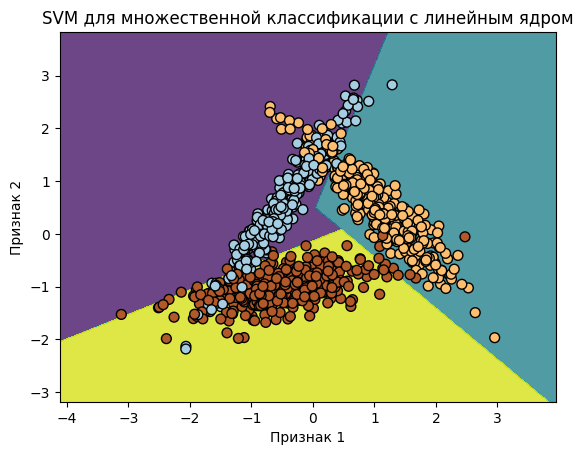

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Генерация данных для множественной классификации
X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Масштабируем данные для лучшей работы алгоритма
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем и обучаем классификатор
svm = SVC(kernel='linear', decision_function_shape='ovr', C=1)
svm.fit(X_scaled, y)

# Создаем сетку для построения границы решений
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Получаем предсказания для сетки
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация границы принятия решений
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.Paired)
plt.title("SVM для множественной классификации с линейным ядром")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()


# Контрольные вопросы

1. Чем отличается класс SVC и LinearSVC в библиотеке sklearn при использовании метода опорных векторов без ядра?

- SVC использует более общий алгоритм для SVM, подходит для любых ядер, включая линейное. При использовании линейного ядра работает так же, как и LinearSVC, но может быть медленнее.

- LinearSVC оптимизирован для работы только с линейным ядром и использует более эффективный метод оптимизации (метод стохастического градиентного спуска), что делает его быстрее на больших датасетах.

2. Чем отличается метод опорных векторов с разными ядрами? Как выбор функции ядра влияет на форму границы принятия решения?

- Линейное ядро:

Граница решения: Прямая или гиперплоскость.
Используется, когда данные линейно разделимы или почти линейно разделимы.
- Полиномиальное ядро:

Граница решения: Кривая, которая может быть сложной, в зависимости от степени полинома.
Полезно для данных, которые не могут быть разделены прямой, но могут быть разделены с помощью кривой.
- Гауссово (RBF) ядро:

Граница решения: Сложная, часто «волнообразная» и гибкая, может адаптироваться к данным с произвольной формой.
Очень мощное ядро, которое может работать с сильно перекрывающимися классами, создает зазор вокруг каждого класса.

3. Как метод опорных векторов работает в задачах множественной классификации?

Метод опорных векторов (SVM) для задач множественной классификации обычно реализуется с помощью подходов "один против всех" (OvA) или "один против одного" (OvO).

- Один против всех (OvA):

Для каждого класса строится отдельный классификатор, который отличает данный класс от всех остальных.
В результате получается столько классификаторов, сколько классов в задаче.
Для классификации нового примера каждый классификатор выдает вероятность принадлежности к своему классу, а итоговое решение принимает классификатор с наибольшей вероятностью.

- Один против одного (OvO):

Для каждой пары классов строится отдельный классификатор, то есть общее количество классификаторов равно числу пар классов.
В процессе классификации каждый классификатор решает, какой из двух классов относится к примеру, и итоговое решение принимается большинством голосов.
В библиотеке scikit-learn класс SVC автоматически использует подход OvA для многоклассовых задач, если количество классов больше двух.

Метод опорных векторов с различными ядрами (например, линейное или RBF) может быть применен для многоклассовой классификации, где границы решений между классами будут учитывать все возможные разделения.

4. Как метод опорных векторов может быть использован для решения задачи регрессии?

Метод опорных векторов (SVM) может быть использован для решения задачи регрессии. В этом случае метод известен как «опорно-векторная регрессия».

Принцип работы заключается в поиске гиперплоскости, при которой риск в многомерном пространстве будет минимальным. По сравнению с традиционной регрессионной моделью SVM оценивает коэффициенты путём минимизации квадратичных потерь. Так, если прогнозное значение попадает в область гиперплоскости, то потери равны нулю, в противном случае — разности прогнозного и фактического значений.

Если данные расположены так, что нельзя провести прямую линию, которая бы чётко разделила их на две группы. Например, если точки расположены в виде окружности, то прямая линия не сможет их разделить на внутренние и внешние. В этом случае SVM может использовать нелинейные функции для преобразования данных в более высокоразмерное пространство.